In [285]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [286]:
# provide paths to data files
stations_file = 'Divvy_Stations_Trips_2014_Q3Q4/Divvy_Stations_2014-Q3Q4.csv'
trips_file1 = 'Divvy_Stations_Trips_2014_Q3Q4/Divvy_Trips_2014-Q3-07.csv'
trips_file2 = 'Divvy_Stations_Trips_2014_Q3Q4/Divvy_Trips_2014-Q3-0809.csv'
trips_file3 = 'Divvy_Stations_Trips_2014_Q3Q4/Divvy_Trips_2014-Q4.csv'

In [287]:
# import data from csv files to Pandas dataframes
stations_data = pd.read_csv(stations_file)
trips_Q307 = pd.read_csv(trips_file1)
trips_Q30809 = pd.read_csv(trips_file2)
trips_Q4 = pd.read_csv(trips_file3)

# concatenate trips data into a single dataframe
trips_data = pd.concat([trips_Q307,trips_Q30809,trips_Q4])

In [288]:
# get info about stations dataframe
stations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           300 non-null    int64  
 1   name         300 non-null    object 
 2   latitude     300 non-null    float64
 3   longitude    300 non-null    float64
 4   dpcapacity   300 non-null    int64  
 5   dateCreated  300 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 14.2+ KB


In [289]:
# get info about trips dataframe
trips_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548935 entries, 0 to 437964
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   trip_id            1548935 non-null  int64  
 1   starttime          1548935 non-null  object 
 2   stoptime           1548935 non-null  object 
 3   bikeid             1548935 non-null  int64  
 4   tripduration       1548935 non-null  int64  
 5   from_station_id    1548935 non-null  int64  
 6   from_station_name  1548935 non-null  object 
 7   to_station_id      1548935 non-null  int64  
 8   to_station_name    1548935 non-null  object 
 9   usertype           1548935 non-null  object 
 10  gender             1071677 non-null  object 
 11  birthyear          1071696 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 153.6+ MB


In [290]:
#view first 5 rows of stations dataframe
stations_data.head()

,id,name,latitude,longitude,dpcapacity,dateCreated
0,5,State St & Harrison St,41.873958,-87.627739,19,6/10/2013 10:46
1,13,Wilton Ave & Diversey Pkwy,41.932500,-87.652681,19,6/22/2013 18:29
2,14,Morgan St & 18th St,41.858086,-87.651073,15,6/22/2013 18:33
3,15,Racine Ave & 19th St,41.856453,-87.656471,15,6/22/2013 18:35
4,16,Wood St & North Ave,41.910329,-87.672516,15,6/22/2013 18:55


In [291]:
# view first 5 rows of trips dataframe
trips_data.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,2886259,7/31/2014 23:56,8/1/2014 0:03,2602,386,291,Wells St & Evergreen Ave,53,Wells St & Erie St,Subscriber,Female,1979.0
1,2886258,7/31/2014 23:58,8/1/2014 0:07,2403,495,98,LaSalle St & Washington St,106,State St & Pearson St,Subscriber,Male,1974.0
2,2886257,7/31/2014 23:58,8/1/2014 2:10,669,7947,240,Sheridan Rd & Irving Park Rd,240,Sheridan Rd & Irving Park Rd,Customer,NaN,NaN
3,2886256,7/31/2014 23:58,8/1/2014 0:19,2431,1282,47,State St & Kinzie St,14,Morgan St & 18th St,Customer,NaN,NaN
4,2886255,7/31/2014 23:57,8/1/2014 2:10,2885,7972,240,Sheridan Rd & Irving Park Rd,240,Sheridan Rd & Irving Park Rd,Customer,NaN,NaN


In [292]:
# clean the trips dataset

def clean_trips(trips_data):
    trips_data['starttime'] = pd.to_datetime(trips_data['starttime']) # convert starttime from string to datetime object
    trips_data['stoptime'] = pd.to_datetime(trips_data['stoptime']) # convert starttime from string to datetime object
    trips_data['startday'] = trips_data['starttime'].dt.dayofyear # add column with day of year of trip start
    trips_data['stopday'] = trips_data['stoptime'].dt.dayofyear # add column with day of year of trip end
    trips_data['starthour'] = trips_data['starttime'].dt.hour
    trips_data['stophour'] = trips_data['stoptime'].dt.hour
    return trips_data
    
trips_data = clean_trips(trips_data) # use clean_trips function to clean dataset

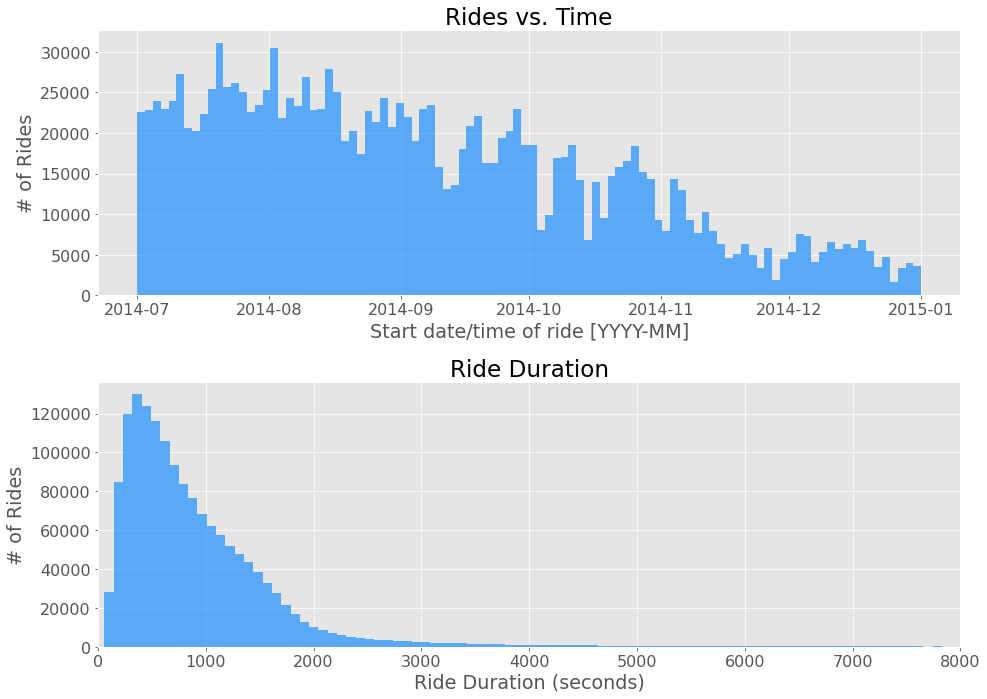

In [299]:
# Exploratory data analysis

# plot rides vs. time
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(14,10))
plt.rcParams.update({'font.size': 16})
ax1.hist(trips_data['starttime'],bins=100,color='dodgerblue',alpha=0.7);
ax1.set_xlabel('Start date/time of ride [YYYY-MM]')
ax1.set_ylabel('# of Rides')
ax1.set_title('Rides vs. Time')
ax2.hist(trips_data['tripduration'],bins=1000,color='dodgerblue',alpha=0.7)
ax2.set_xlabel('Ride Duration (seconds)')
ax2.set_ylabel('# of Rides')
ax2.set_title('Ride Duration')
ax2.set_xlim([0,8000])
plt.tight_layout()

# we can see that rides decrease significantly from Q3 to the end of Q4 - probably due to weather 
# ideally this analysis will suggest stations that need additional bike capacity to keep people from having to walk
# in winter which presumably discourages ridership



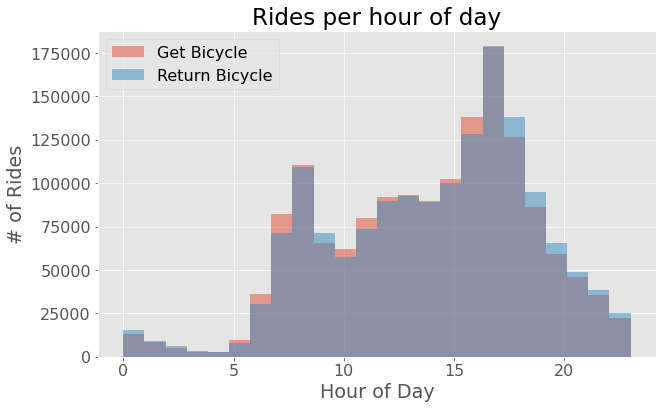

In [303]:
# plot rides per hour of day, and whether the bikes were being taken or returned to the station
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(trips_data['starthour'],bins=24,alpha=0.5,label='Get Bicycle')
ax.hist(trips_data['stophour'],bins=24,alpha=0.5,label='Return Bicycle')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('# of Rides')
ax.set_title('Rides per hour of day')
ax.legend()

Text(0.5, 1.0, 'User Types')

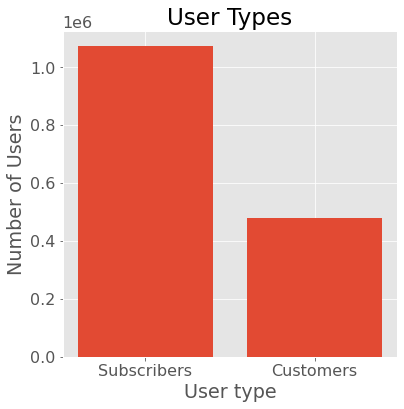

In [272]:
# plot customer types
subscribers, customers = trips_data['usertype'].value_counts() # count number of subscribers vs customers
x = ['Subscribers','Customers'] # set x values for plotting

fig, ax = plt.subplots(figsize=(6,6))
ax.bar(x,[subscribers,customers]) # create bar chart of customer types
ax.set_xlabel('User type')
ax.set_ylabel('Number of Users')
ax.set_title('User Types')


Text(0.5, 1.0, 'Bikes Returned To Stations')

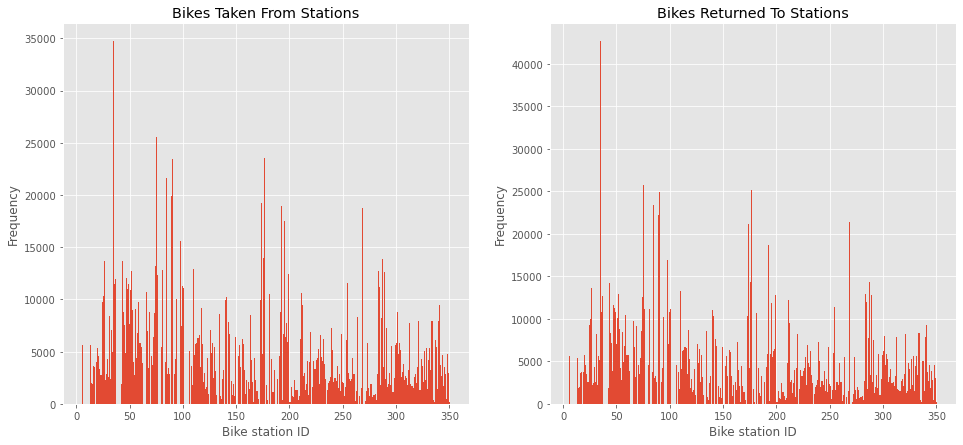

In [250]:
# plot histograms of frequency bikes were taken from and returned to each station
plt.style.use('ggplot')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,7))
ax1.hist(trips_data['from_station_id'],bins=350);
ax1.set_xlabel('Bike station ID')
ax1.set_ylabel('Frequency')
ax1.set_title('Bikes Taken From Stations')
ax2.hist(trips_data['to_station_id'],bins=350);
ax2.set_xlabel('Bike station ID')
ax2.set_ylabel('Frequency')
ax2.set_title('Bikes Returned To Stations')

# it appears generally that stations with high rates of bikes being taken from them also have high return rates


In [122]:
# calculate averages of bikes used per day at all stations

# calculate average number of bikes taken each day from each station
taken = trips_data.groupby(['from_station_id','startday']).size().to_frame('size')
average_bikes_taken_per_day = taken.groupby('from_station_id').mean()

# calculate average number of bikes returned each day to each station
returned = trips_data.groupby(['to_station_id','startday']).size().to_frame('size')
average_bikes_returned_per_day = returned.groupby('to_station_id').mean()

# add two new columns to stations dataframe with the above calculations
stations_data['average_taken_per_day'] = list(average_bikes_taken_per_day['size'])
stations_data['average_returned_per_day'] = list(average_bikes_returned_per_day['size'])

In [128]:
stations_data.head()

,id,name,latitude,longitude,dpcapacity,dateCreated,average_taken_per_day,average_returned_per_day
0,5,State St & Harrison St,41.873958,-87.627739,19,6/10/2013 10:46,30.513661,30.690217
1,13,Wilton Ave & Diversey Pkwy,41.932500,-87.652681,19,6/22/2013 18:29,30.858696,29.153005
2,14,Morgan St & 18th St,41.858086,-87.651073,15,6/22/2013 18:33,10.780220,10.942197
3,15,Racine Ave & 19th St,41.856453,-87.656471,15,6/22/2013 18:35,10.926554,11.179775
4,16,Wood St & North Ave,41.910329,-87.672516,15,6/22/2013 18:55,19.744565,20.010870


Text(0.5, 1.0, 'Bike capacity vs. bikes returned per day')

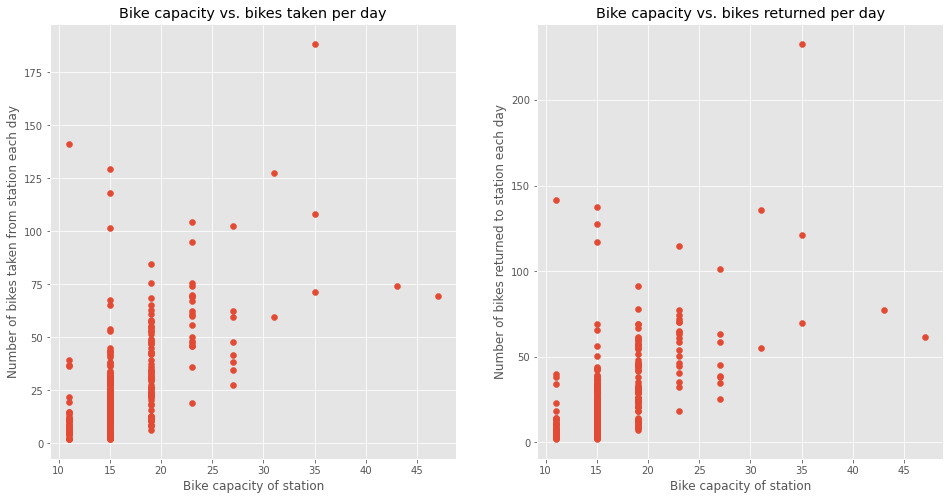

In [134]:
# plot bike capacity vs. how many bikes are taken and returned each day from each station id
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
ax1.scatter(stations_data['dpcapacity'],stations_data['average_taken_per_day'])
ax1.set_xlabel('Bike capacity of station')
ax1.set_ylabel('Number of bikes taken from station each day')
ax1.set_title('Bike capacity vs. bikes taken per day')
ax2.scatter(stations_data['dpcapacity'],stations_data['average_returned_per_day'])
ax2.set_xlabel('Bike capacity of station')
ax2.set_ylabel('Number of bikes returned to station each day')
ax2.set_title('Bike capacity vs. bikes returned per day')

# from these graphs we can see there are outliers, where some stations have too high of bike capacity and some have too low capacity

In [139]:
# calculate a utilization ratio for stations bikes were taken from and returned to 
taken_utilization_ratio = stations_data['average_taken_per_day'] / stations_data['dpcapacity'] 
returned_utilization_ratio = stations_data['average_returned_per_day'] / stations_data['dpcapacity'] 

# add utilization columns to stations_data dataframe
stations_data['taken_utilization_ratio'] = list(taken_utilization_ratio)
stations_data['returned_utilization_ratio'] = list(returned_utilization_ratio)

In [274]:
stations_data.head()

,id,name,latitude,longitude,dpcapacity,dateCreated
0,5,State St & Harrison St,41.873958,-87.627739,19,6/10/2013 10:46
1,13,Wilton Ave & Diversey Pkwy,41.932500,-87.652681,19,6/22/2013 18:29
2,14,Morgan St & 18th St,41.858086,-87.651073,15,6/22/2013 18:33
3,15,Racine Ave & 19th St,41.856453,-87.656471,15,6/22/2013 18:35
4,16,Wood St & North Ave,41.910329,-87.672516,15,6/22/2013 18:55


In [154]:
# calculate bottom 10% and top 10% stations by utilization (bikes taken from station)
bottom_10_percent_utilized_taken = list(stations_data.sort_values(by=['taken_utilization_ratio'],ascending=True)['id'].iloc[0:30])
top_10_percent_utilized_taken = list(stations_data.sort_values(by=['taken_utilization_ratio'],ascending=False)['id'].iloc[0:30])

# calculate bottom 10% and top 10% stations by utilization (bikes returned to station)
bottom_10_percent_utilized_returned = list(stations_data.sort_values(by=['returned_utilization_ratio'],ascending=True)['id'].iloc[0:30])
top_10_percent_utilized_returned = list(stations_data.sort_values(by=['returned_utilization_ratio'],ascending=False)['id'].iloc[0:30])

# find the intersection of the bottom 10% for both taken and returned lists
intersection_set_bottom10percent = set.intersection(set(bottom_10_percent_utilized_taken), set(bottom_10_percent_utilized_returned))

# find the intersection of the top 10% for both taken and returned lists
intersection_set_top10percent = set.intersection(set(top_10_percent_utilized_taken), set(top_10_percent_utilized_returned))


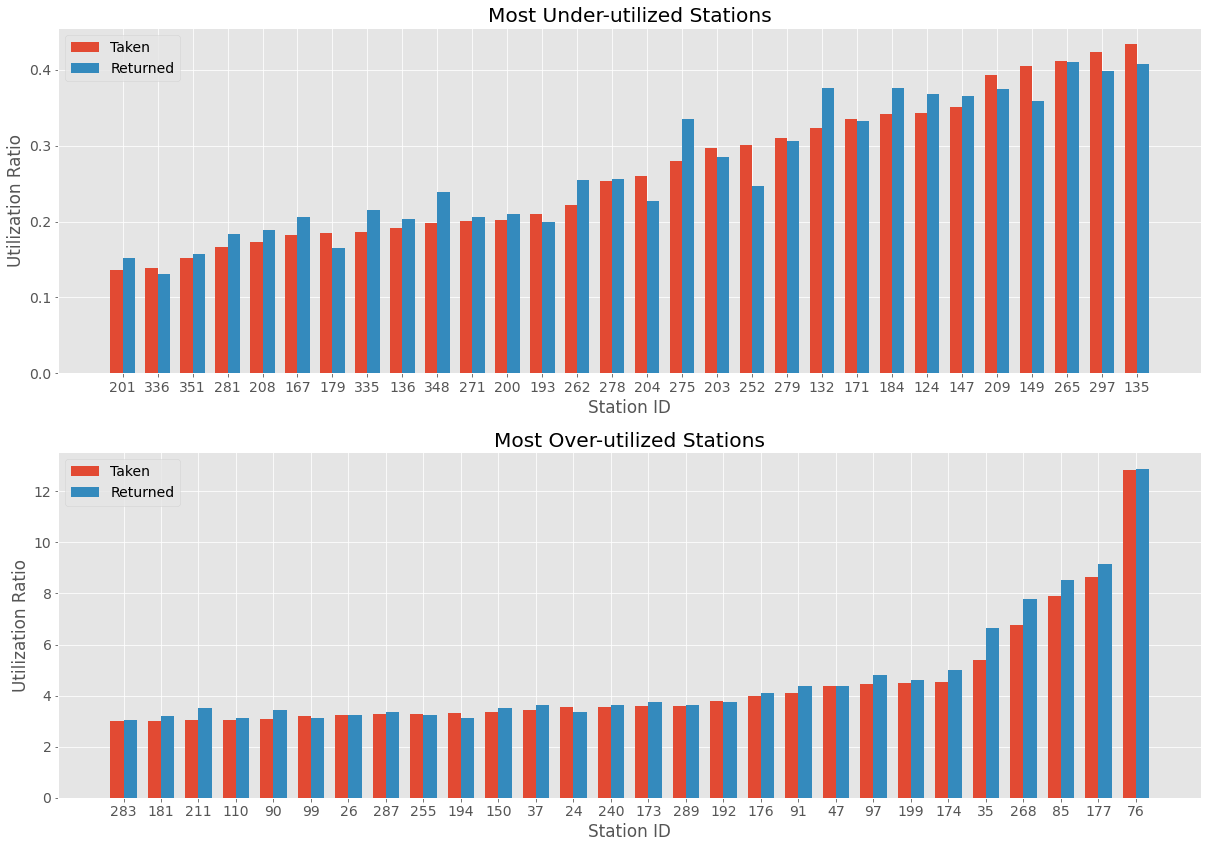

In [203]:
# plot utilizations

# set up variables for plotting
bottom_df = stations_data.loc[stations_data['id'].isin(intersection_set_bottom10percent)].sort_values(by=['taken_utilization_ratio']) # get dataframe of only bottom 10% utilized stations
top_df = stations_data.loc[stations_data['id'].isin(intersection_set_top10percent)].sort_values(by=['taken_utilization_ratio'], ascending=True) # get dataframe of only top 10% utilized stations
x_bottom = np.arange(0,len(bottom_df)) # create x variable for plotting bottom 10% stations
x_top = np.arange(0,len(top_df)) # create x variable for plotting top 10% stations
bottom_labels = list(bottom_df['id']) # set bottom labels to correct station ids
top_labels = list(top_df['id']) # set bottom labels to correct station ids

width = 0.35

# plot most underutilized and most overutilized bike stations
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(17,12))
plt.rcParams.update({'font.size': 14})

ax1.bar(x_bottom-width/2,list(bottom_df['taken_utilization_ratio']),width,label='Taken') # plot taken utilization ratios using bar plot
ax1.bar(x_bottom+width/2,list(bottom_df['returned_utilization_ratio']),width,label='Returned') # plot returned utilization ratios using bar plot
ax1.set_xticks(x_bottom)
ax1.set_xticklabels(bottom_labels)
ax1.legend()
ax1.set_xlabel('Station ID')
ax1.set_ylabel('Utilization Ratio')
ax1.set_title('Most Under-utilized Stations')

ax2.bar(x_top-width/2,list(top_df['taken_utilization_ratio']),width,label='Taken') # plot taken utilization ratios using bar plot
ax2.bar(x_top+width/2,list(top_df['returned_utilization_ratio']),width,label='Returned') # plot returned utilization ratios using bar plot
ax1.set_xticks(x_bottom)
ax2.set_xticks(x_top)
ax2.set_xticklabels(top_labels)
ax2.legend()
ax2.set_xlabel('Station ID')
ax2.set_ylabel('Utilization Ratio')
ax2.set_title('Most Over-utilized Stations')
fig.tight_layout()

In [223]:
# print most underutilized station names (stations we would suggest not adding more bike capacity)
most_underutilized = list(bottom_df['name'])
print(f'The stations with the lowest utilizations are: {most_underutilized} \n')

# print most overutilized station names (stations we would suggest adding additional capacity)
most_overutilized = list(top_df['name'])
print(f'The stations with the highest utilizations are: {most_overutilized}')

The stations with the lowest utilizations are: ['Indiana Ave & 40th St', 'Cottage Grove Ave & 47th St', 'Cottage Grove Ave & 51st St', 'Western Ave & 24th St', 'Ashland Ave & 21st St', 'Damen Ave & Coulter St', 'MLK Jr Dr & Oakwood Blvd', 'Calumet Ave & 35th St', 'Racine Ave & 13th St', 'California Ave & 21st St', 'Cottage Grove Ave & 43rd St', 'MLK Jr Dr & 47th St', 'State St & 29th St', 'Halsted St & 37th St', 'Wallace Ave & 35th St', 'Prairie Ave & Garfield Blvd', 'Ashland Ave & 13th St', 'Western Ave & 21st St', 'Greenwood Ave & 47th St', 'Halsted St & 35th St', 'Wentworth Ave & 24th St', 'May St & Cullerton St', 'State St & 35th St', 'Damen Ave & Cullerton St', 'Indiana Ave & 26th St', 'Normal Ave & Archer Ave', 'Calumet Ave & 33rd St', 'Cottage Grove Ave & Oakwood Blvd', 'Paulina St & Montrose Ave', 'Halsted St & 21st St'] 

The stations with the highest utilizations are: ['LaSalle St & Jackson Blvd', 'LaSalle St & Illinois St', 'St Clair St & Erie St', 'State St & Erie St', 'Mil